In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [165]:
def plot_scatterplot(data, x, y, hue, figsize):
    plt.figure(figsize=figsize)
    sns.scatterplot(y=y,x=x,data=data
                , palette='rainbow', hue = hue, s= 100)
    plt.xticks(rotation = 90)
    plt.show()

## Read all the files

In [2]:
df_lc = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/lead_calls.csv')
df_leads = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/leads.csv', encoding= 'unicode_escape')
df_tc = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/telecallers.csv')

In [6]:
df_leads.apply(pd.Series.nunique)


id             9916
userId         5977
name           6511
phoneNumber       1
city             61
state            20
source          108
isExternal        2
createdAt      9880
receivedAt     1308
dtype: int64

In [7]:
df_leads.shape

(9916, 10)

In [14]:
df_leads = df_leads.rename(columns = {'id' : 'leadId'})

In [16]:
df_leads.head()

,leadId,userId,name,phoneNumber,city,state,source,isExternal,createdAt,receivedAt
0,00021a29-83e4-48d3-8cc3-0bc729f087fd,NaN,KUPENDRA,1234567890,NaN,NaN,Airavatha data,True,2019-12-26T18:17:13.115Z,2019-11-01T05:41:00Z
1,000743a8-3bd5-4e5a-97ed-dcf0af91aeb7,e50fccfe-82aa-434a-ad92-9d3f9d651f84,Dinkle Unknown,1234567890,Delhi/NCR,Delhi-NCR,delhi-18-33yo-10-15k-hdat-july-17,False,2019-12-26T17:49:53.471Z,2019-08-25T00:00:00Z
2,0013dc91-e0e3-48f6-9518-6cf8389dd923,NaN,Elikatte Kumaraswamy,1234567890,Hyderabad,Telangana,WhatsApp OptIn Form,False,2019-12-26T17:21:04.021Z,2019-07-25T00:00:00Z
3,001477a2-80d0-4b6d-a392-16aeaeef805d,4e0222f0-42aa-4660-976b-8e9329b4b1a7,Raju Unknown,1234567890,Hyderabad,Telangana,Referrals,False,2019-12-26T17:26:31.459Z,2019-06-03T00:00:00Z
4,0014961d-9b66-4cae-85aa-acb89cd51f1e,NaN,Arunkumar Unknown,1234567890,Bangalore,Karnataka,Reused Leads,False,2019-12-26T17:21:05.065Z,2019-04-01T00:00:00Z


In [17]:
## add leads location data to leads data dataframe

df_lc = pd.merge(df_lc, df_leads[['leadId', 'city', 'state']], on = 'leadId', how = 'left')

In [18]:
df_lc.head()

,id,telecallerId,leadId,client,status,comments,calledAt,createdAt,city,state
0,00028a99-c401-4048-9b75-b923cff55a79,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,724467a5-52d1-4989-a870-99ae65d3e0e8,Amazon Flex,Not Interested - Applied by Mistake,NaN,2019-07-25T17:00:00Z,2019-12-26T17:32:49.297Z,Bangalore,Karnataka
1,00033b17-3a2a-4769-8623-bb00adf1e4c5,4248b521-ce3f-4897-a30d-35c9ee81f746,65d4429f-cb34-436d-9020-1fd6f364367f,KFC,RNR,NaN,2019-10-10T17:30:00Z,2019-12-26T18:09:38.408Z,Bangalore,Karnataka
2,0003dcc7-05d0-4736-a415-5e67ea95c24e,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,fea7fb85-3355-4747-98fd-dae1b9aca52a,Lalamove,Not Interested - Disconnected the Call,NaN,2019-08-30T14:00:00Z,2019-12-26T17:42:55.007Z,Hyderabad,Telangana
3,00042f93-1e19-418f-bf38-1a8a8f758952,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,3308d114-a9ed-4d81-8d08-50b28171790f,Zomato,Not Interested,Not Looking for Job,2020-06-01T10:30:00Z,2019-12-26T17:26:36.333Z,Hyderabad,Telangana
4,0006f07e-f4d1-4387-8540-fc8bf6e67676,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,924cdffb-693f-4870-8179-d80571e1fc85,NaN,Not Applied,NaN,2020-04-01T10:30:00Z,2019-12-26T17:21:12.255Z,Hyderabad,Telangana


In [19]:
## binary column where value = 1 if lead joined and 0 if lead did not join

df_lc['statusNum'] = np.where(df_lc['status']=='Joined', 1, 0)

In [31]:
## get leadsConverted and totalLeads number for each telecaller in each city 
## by taking groupby as sum and count and merging them  

df_grp = pd.merge(df_lc.groupby(by = x, as_index = False).sum().rename(columns = {'statusNum' : 'leadsConverted'}), 
        df_lc[['telecallerId', 'city', 'statusNum']].groupby(by = ['telecallerId', 'city'], 
                                as_index = False).count().rename(columns = {'statusNum' : 'totalLeads'}),
                                on = ['telecallerId', 'city'], how = 'left')

In [33]:
df_grp['effectiveness'] = df_grp['leadsConverted']/df_grp['totalLeads']


In [34]:
df_grp

,telecallerId,city,leadsConverted,totalLeads,effectiveness
0,4248b521-ce3f-4897-a30d-35c9ee81f746,Ahmedabad,0,1,0.000000
1,4248b521-ce3f-4897-a30d-35c9ee81f746,Aligarh,0,5,0.000000
2,4248b521-ce3f-4897-a30d-35c9ee81f746,Asansol,0,1,0.000000
3,4248b521-ce3f-4897-a30d-35c9ee81f746,Bangalore,8,671,0.011923
4,4248b521-ce3f-4897-a30d-35c9ee81f746,Chandigarh,0,1,0.000000
...,...,...,...,...,...
79,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Vishakhapatnam,0,12,0.000000
80,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Vizianagaram,0,1,0.000000
81,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Warangal,0,15,0.000000
82,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Yadhgirir,0,10,0.000000


In [35]:
## add telecaller names for visualisation

df_grp = pd.merge(df_grp, df_tc[['id', 'name']].rename(columns = {'id' : 'telecallerId'}), how = 'left', \
        on = 'telecallerId')


In [37]:
df_grp

,telecallerId,city,leadsConverted,totalLeads,effectiveness,name
0,4248b521-ce3f-4897-a30d-35c9ee81f746,Ahmedabad,0,1,0.000000,Amila
1,4248b521-ce3f-4897-a30d-35c9ee81f746,Aligarh,0,5,0.000000,Amila
2,4248b521-ce3f-4897-a30d-35c9ee81f746,Asansol,0,1,0.000000,Amila
3,4248b521-ce3f-4897-a30d-35c9ee81f746,Bangalore,8,671,0.011923,Amila
4,4248b521-ce3f-4897-a30d-35c9ee81f746,Chandigarh,0,1,0.000000,Amila
...,...,...,...,...,...,...
79,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Vishakhapatnam,0,12,0.000000,Sheeba
80,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Vizianagaram,0,1,0.000000,Sheeba
81,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Warangal,0,15,0.000000,Sheeba
82,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Yadhgirir,0,10,0.000000,Sheeba


In [91]:
df_grp[['name', 'city', 'effectiveness']]

,name,city,effectiveness
0,Amila,Ahmedabad,0.000000
1,Amila,Aligarh,0.000000
2,Amila,Asansol,0.000000
3,Amila,Bangalore,0.011923
4,Amila,Chandigarh,0.000000
...,...,...,...
79,Sheeba,Vishakhapatnam,0.000000
80,Sheeba,Vizianagaram,0.000000
81,Sheeba,Warangal,0.000000
82,Sheeba,Yadhgirir,0.000000


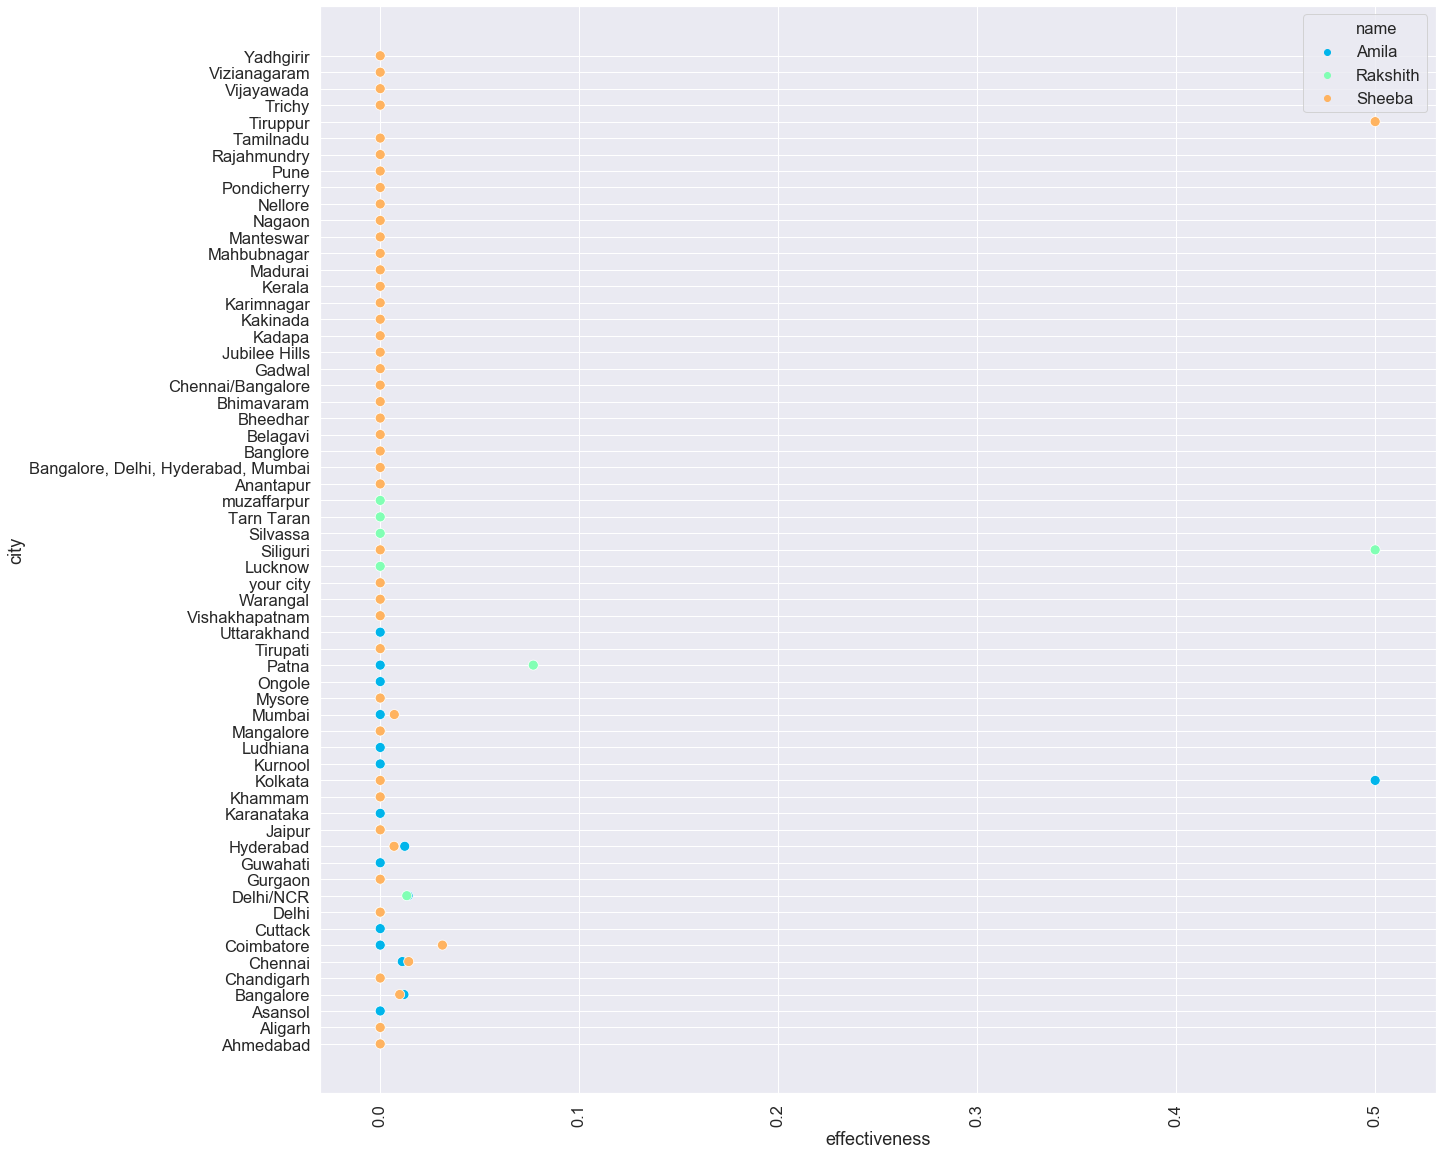

In [156]:
## plot effectiveness of telecallers across cities

plot_scatterplot(data = df_grp[['name', 'city', 'effectiveness']], x = 'effectiveness', y = 'city',\
                hue = 'name', figsize = (20,20))

In [167]:
## remove cities with 0 effectiveness 

df_grp_non_zero = df_grp[df_grp['effectiveness'] > 0].reset_index(drop = True)
df_grp_non_zero.head()

,telecallerId,city,leadsConverted,totalLeads,effectiveness,name
0,4248b521-ce3f-4897-a30d-35c9ee81f746,Bangalore,8,671,0.011923,Amila
1,4248b521-ce3f-4897-a30d-35c9ee81f746,Chennai,4,361,0.011080,Amila
2,4248b521-ce3f-4897-a30d-35c9ee81f746,Delhi/NCR,10,714,0.014006,Amila
3,4248b521-ce3f-4897-a30d-35c9ee81f746,Hyderabad,12,975,0.012308,Amila
4,4248b521-ce3f-4897-a30d-35c9ee81f746,Kolkata,1,2,0.500000,Amila


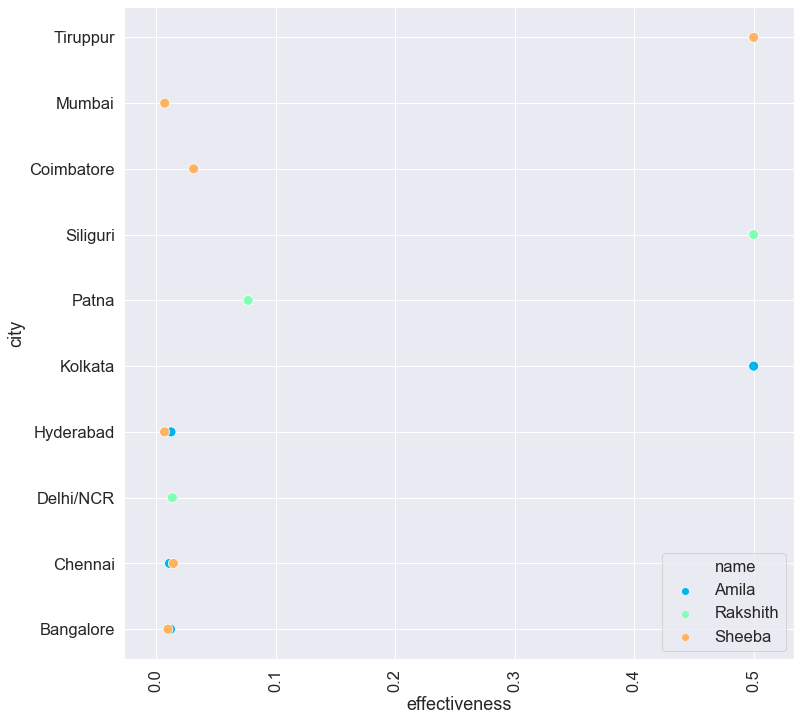

In [166]:
## plot the above dataframe

plot_scatterplot(data = df_grp_non_zero, x = 'effectiveness', y = 'city',\
                hue = 'name', figsize = (12,12))

In [168]:
## find the city with the most leads converted for each telecaller

df_max = df_grp_non_zero.sort_values(by = ['name', 'leadsConverted'], ascending = False).reset_index(drop = True)
df_max = df_max.drop_duplicates(subset = ['name'], keep = 'first').reset_index(drop = True)
df_max

,telecallerId,city,leadsConverted,totalLeads,effectiveness,name
0,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Bangalore,26,2658,0.009782,Sheeba
1,89b29324-8f3b-4b50-b3f7-0a3e0918e4d2,Delhi/NCR,4,300,0.013333,Rakshith
2,4248b521-ce3f-4897-a30d-35c9ee81f746,Hyderabad,12,975,0.012308,Amila


In [169]:
## find the city with the least(above 0) leads converted for each telecaller

df_min = df_grp_non_zero.sort_values(by = ['name', 'leadsConverted'], ascending = True)
df_min = df_min.drop_duplicates(subset = ['name'], keep = 'first').reset_index(drop = True)
df_min

,telecallerId,city,leadsConverted,totalLeads,effectiveness,name
0,4248b521-ce3f-4897-a30d-35c9ee81f746,Kolkata,1,2,0.50000,Amila
1,89b29324-8f3b-4b50-b3f7-0a3e0918e4d2,Siliguri,1,2,0.50000,Rakshith
2,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Coimbatore,1,32,0.03125,Sheeba


## Effectiveness across location with "Language Barrier" response

In [128]:
## read files

df_lc = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/lead_calls.csv')
df_leads = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/leads.csv', encoding= 'unicode_escape')
df_tc = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/telecallers.csv')

In [129]:
df_leads = df_leads.rename(columns = {'id' : 'leadId'})

In [130]:
## add locaion data to leads data table

df_lc = pd.merge(df_lc, df_leads[['leadId', 'city', 'state']], on = 'leadId', how = 'left')

In [131]:
## binary column where value = 1 if lead joined and 0 if lead did not join
## opposite of how np.where was used above

df_lc['statusNum'] = np.where(df_lc['status']=='Joined', 0, 1)

In [132]:
## keep records which have status as Language Barrier 

df_lang = df_lc[df_lc['status'] == 'Language Barrier'].reset_index(drop = True)

In [149]:
df_lang.head()

,telecallerId,state,leadsFailed,name
0,4248b521-ce3f-4897-a30d-35c9ee81f746,Delhi,1,Amila
1,4248b521-ce3f-4897-a30d-35c9ee81f746,Delhi-NCR,1,Amila
2,4248b521-ce3f-4897-a30d-35c9ee81f746,Karnataka,1,Amila
3,4248b521-ce3f-4897-a30d-35c9ee81f746,Maharashtra,1,Amila
4,4248b521-ce3f-4897-a30d-35c9ee81f746,Tamil Nadu,3,Amila


In [141]:
## get number of leads lost by. telecallers by taking froupby on ['telecallerId', 'state'] as sum

df_lang = df_lang[['telecallerId', 'state', 'statusNum']].groupby(by = ['telecallerId', 'state'], \
                                                                  as_index = False).sum()
df_lang = df_lang.rename(columns = {'statusNum' : 'leadsFailed'})

In [142]:
## add telecaller name for visualisation

df_lang = pd.merge(df_lang, df_tc[['id', 'name']].rename(columns = {'id' : 'telecallerId'}), how = 'left', \
        on = 'telecallerId')


In [143]:
df_lang

,telecallerId,state,leadsFailed,name
0,4248b521-ce3f-4897-a30d-35c9ee81f746,Delhi,1,Amila
1,4248b521-ce3f-4897-a30d-35c9ee81f746,Delhi-NCR,1,Amila
2,4248b521-ce3f-4897-a30d-35c9ee81f746,Karnataka,1,Amila
3,4248b521-ce3f-4897-a30d-35c9ee81f746,Maharashtra,1,Amila
4,4248b521-ce3f-4897-a30d-35c9ee81f746,Tamil Nadu,3,Amila
5,4248b521-ce3f-4897-a30d-35c9ee81f746,Telangana,3,Amila
6,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Delhi,19,Sheeba
7,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Karnataka,17,Sheeba
8,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Maharashtra,3,Sheeba
9,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Rajasthan,2,Sheeba


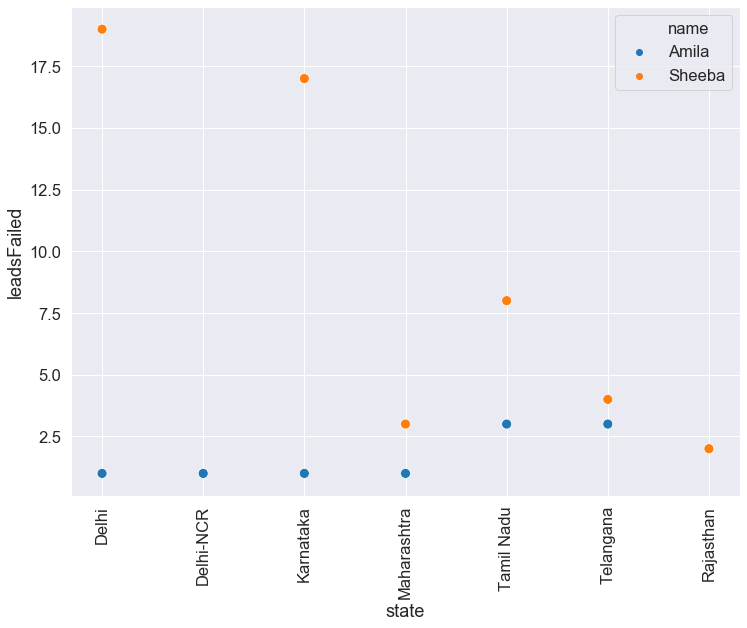

In [148]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='state',y='leadsFailed',data=df_lang
            , palette='tab10', hue = 'name', s= 100)
plt.xticks(rotation = 90)
plt.show()